In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/filldata'
#merged_data = pd.DataFrame()

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

Data_Scaler_20181127.csv
(649568, 6)
                           Data_Scaler_2018112  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0
(649568,)
Data_Scaler_20180510.csv
(1065584, 6)
                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
(1065584,)


In [4]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [5]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [6]:
#Concatenating all channels, training data
result0 = dataset_train.loc[dataset_train['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_train.loc[dataset_train['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_train.loc[dataset_train['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_train.loc[dataset_train['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_train.loc[dataset_train['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_train.loc[dataset_train['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_train.loc[dataset_train['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_train.loc[dataset_train['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_train.loc[dataset_train['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_train.loc[dataset_train['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_train.loc[dataset_train['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_train.loc[dataset_train['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_train.loc[dataset_train['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_train.loc[dataset_train['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_train.loc[dataset_train['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_train.loc[dataset_train['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df=  df.drop(df[['Ch']], axis=1)
display(df)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,0,0,0,0,0,0,0,0,0,0,...,627,574,593,623,469,440,530,435,412,459
2018-05-10 20:54:20+00:00,2,595,715,927,837,897,823,703,794,472,...,633,617,580,632,487,457,588,422,454,469
2018-05-10 20:54:21+00:00,3,627,746,1016,888,900,786,714,794,451,...,600,573,594,600,491,541,564,440,432,473
2018-05-10 20:54:22+00:00,1,646,731,935,882,929,811,735,842,468,...,642,649,638,627,482,473,530,412,467,439
2018-05-10 20:54:22+00:00,1,669,776,1018,868,930,779,749,840,445,...,598,598,603,679,485,502,523,401,470,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,0,658,768,626,627,694,642,584,700,538,...,773,607,611,632,564,614,675,612,617,615
2018-05-11 10:22:52+00:00,0,633,703,647,664,706,557,556,667,516,...,739,564,622,669,521,535,670,542,618,663
2018-05-11 10:22:53+00:00,2,608,767,565,612,661,593,554,681,482,...,709,580,605,616,562,505,619,494,615,611


In [7]:
#Concatenating all channels, test data
result0 = dataset_test.loc[dataset_test['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_test.loc[dataset_test['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_test.loc[dataset_test['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_test.loc[dataset_test['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_test.loc[dataset_test['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_test.loc[dataset_test['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_test.loc[dataset_test['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_test.loc[dataset_test['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_test.loc[dataset_test['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_test.loc[dataset_test['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_test.loc[dataset_test['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_test.loc[dataset_test['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_test.loc[dataset_test['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_test.loc[dataset_test['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_test.loc[dataset_test['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_test.loc[dataset_test['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df1 = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df1 =  df1.drop(df1[['Ch']], axis=1)
display(df1)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:15+00:00,0,24,26,57,39,41,45,36,32,19,...,21,18,22,27,26,31,32,11,24,24
2018-11-27 22:50:15+00:00,0,23,27,47,41,42,44,42,37,16,...,25,30,23,24,22,23,15,7,26,22
2018-11-27 22:50:16+00:00,2,27,32,59,62,58,46,41,48,29,...,28,27,30,37,26,18,16,33,31,29
2018-11-27 22:50:17+00:00,0,21,28,47,61,47,35,37,42,24,...,34,19,27,23,17,15,22,18,22,28
2018-11-27 22:50:18+00:00,1,31,21,62,49,47,45,40,53,19,...,29,33,32,32,25,38,31,19,26,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0,174,17,11,18,17,14,14,9,17,...,13,10,18,17,24,12,22,18,18,27
2018-11-28 07:03:38+00:00,0,169,17,14,14,25,9,13,12,19,...,17,14,16,20,17,18,13,16,18,22
2018-11-28 07:03:39+00:00,0,167,18,14,25,13,11,19,15,18,...,17,15,24,19,26,7,17,15,28,22


In [8]:
X_train = df
X_test = df1

In [9]:
# Normalize data
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)

In [10]:
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dropout 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


tensorflow.random.set_seed(10)
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1(0.0)))
model.add(Dense(3, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='sigmoid',kernel_initializer='glorot_uniform')) #sigmoid at last level, batch size=100, threshold=0.0017
#model.add(Dense(10, activation='relu',kernel_initializer='glorot_uniform'))  #relu at last level, batch size=50, threshold=0.00078
model.add(Dense(X_train.shape[1],kernel_initializer='glorot_uniform')) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


2022-08-08 11:11:39.063511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/thepeg/2.2.3-bb611/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/herwig++/7.2.3-5f56d/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                490       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 48)                528       
                                                                 
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


2022-08-08 11:12:06.621492: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-08 11:12:06.621570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lxplus749.cern.ch): /proc/driver/nvidia/version does not exist
2022-08-08 11:12:06.623784: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#Fit the model
history=model.fit(np.array(X_train),np.array(X_train),epochs=100,
                  validation_split=0.20,
                  batch_size=100,shuffle=True,
                  verbose = 1)

Epoch 1/100
533/533 [==============================] - 2s 2ms/step - loss: 0.0927 - val_loss: 0.0665
Epoch 2/100
533/533 [==============================] - 1s 1ms/step - loss: 0.0333 - val_loss: 0.0661
Epoch 3/100
533/533 [==============================] - 1s 1ms/step - loss: 0.0333 - val_loss: 0.0646
Epoch 4/100
533/533 [==============================] - 1s 1ms/step - loss: 0.0333 - val_loss: 0.0657
Epoch 5/100
533/533 [==============================] - 1s 2ms/step - loss: 0.0333 - val_loss: 0.0670
Epoch 6/100
533/533 [==============================] - 1s 1ms/step - loss: 0.0333 - val_loss: 0.0634
Epoch 7/100
533/533 [==============================] - 1s 1ms/step - loss: 0.0334 - val_loss: 0.0644
Epoch 8/100
533/533 [==============================] - 1s 2ms/step - loss: 0.0334 - val_loss: 0.0642
Epoch 9/100
533/533 [==============================] - 1s 2ms/step - loss: 0.0333 - val_loss: 0.0670
Epoch 10/100
533/533 [==============================] - 1s 2ms/step - loss: 0.0334 - val_lo

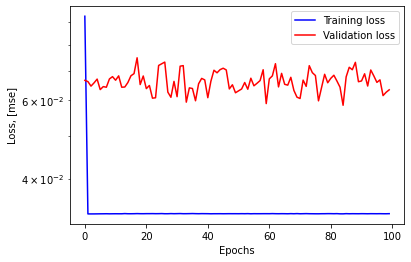

In [12]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()


In [13]:
#Compute RMSE
pred = model.predict(X_train)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_train))

pred = model.predict(X_test)
score2 = np.sqrt(metrics.mean_squared_error(pred,X_test))


print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Test Samples Good Score (RMSE): {score2}")


2022-08-08 11:13:33.457468: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.


Insample Good Score (RMSE): 0.19835304895250724
Test Samples Good Score (RMSE): 0.6845760644818722


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


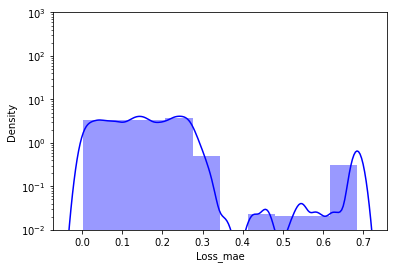

In [16]:
# Distribution of loss function in the training set
import seaborn as sns
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)
plt.show()

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


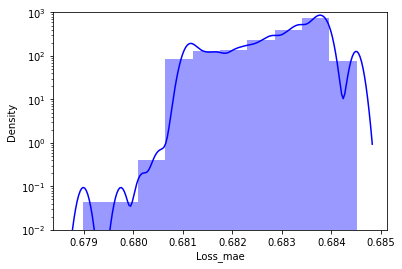

In [17]:
# Distribution of loss function in the test set
import seaborn as sns
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)
plt.show()

In [18]:
# Setting threshold

X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.68 #sigmoid+batch_size=100
#scored['Threshold'] = 0.00078 #relu+batch_size=50
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,0.684496,0.68,True
2018-11-27 22:50:15+00:00,0.684499,0.68,True
2018-11-27 22:50:16+00:00,0.684494,0.68,True
2018-11-27 22:50:17+00:00,0.684498,0.68,True
2018-11-27 22:50:18+00:00,0.684497,0.68,True


In [19]:
# all train data

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.68 #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])

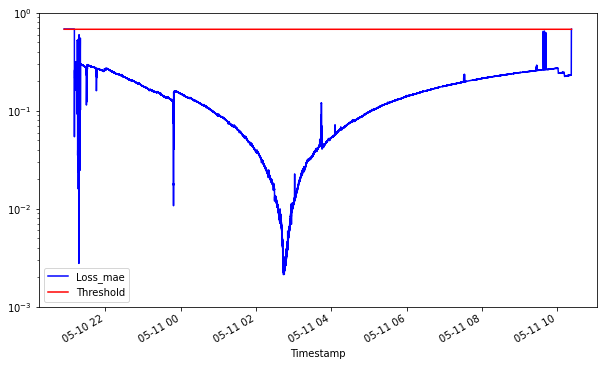

In [21]:
scored_train.plot(logy=True,  figsize = (10,6), ylim = [1e-3,1], color = ['blue','red'])
plt.show()

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:503: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


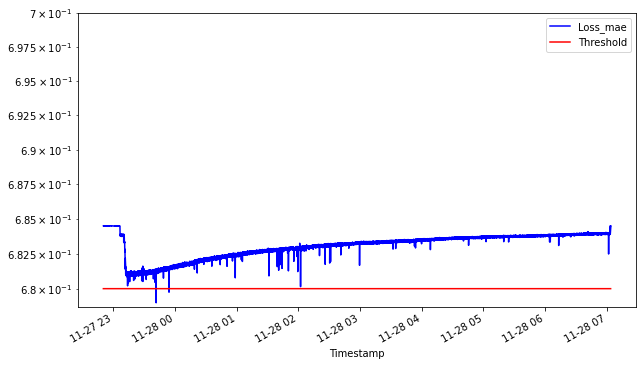

In [22]:
scored.plot(logy=True,  figsize = (10,6), ylim = [0,7e-1], color = ['blue','red'])
plt.show()

In [23]:
#Plot anomalies-Test 
anomalies = scored.loc[scored['Anomaly'] == True]
df=anomalies.merge(X_test, on = 'Timestamp', how='left')
df['Timestamp'] = df.index
#ax=X_test.plot()
#df.plot.scatter(ax=ax, x= 'Timestamp', y='s1', color= 'r')

In [24]:
display(df)

,Loss_mae,Threshold,Anomaly,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,...,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15,Timestamp
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:15+00:00,0.684496,0.68,True,0.000000,0.000006,0.000006,0.000013,0.000010,0.000010,0.000011,...,-0.000134,-0.000141,-0.000127,-0.000105,-0.000115,-0.000118,-0.000099,-0.000109,-0.000111,2018-11-27 22:50:15+00:00
2018-11-27 22:50:15+00:00,0.684496,0.68,True,0.000000,0.000006,0.000006,0.000011,0.000011,0.000010,0.000011,...,-0.000131,-0.000140,-0.000128,-0.000106,-0.000117,-0.000123,-0.000100,-0.000108,-0.000112,2018-11-27 22:50:15+00:00
2018-11-27 22:50:15+00:00,0.684499,0.68,True,0.000000,0.000006,0.000006,0.000013,0.000010,0.000010,0.000011,...,-0.000134,-0.000141,-0.000127,-0.000105,-0.000115,-0.000118,-0.000099,-0.000109,-0.000111,2018-11-27 22:50:15+00:00
2018-11-27 22:50:15+00:00,0.684499,0.68,True,0.000000,0.000006,0.000006,0.000011,0.000011,0.000010,0.000011,...,-0.000131,-0.000140,-0.000128,-0.000106,-0.000117,-0.000123,-0.000100,-0.000108,-0.000112,2018-11-27 22:50:15+00:00
2018-11-27 22:50:16+00:00,0.684494,0.68,True,0.000159,0.000007,0.000007,0.000014,0.000016,0.000014,0.000012,...,-0.000132,-0.000138,-0.000125,-0.000105,-0.000119,-0.000122,-0.000093,-0.000107,-0.000110,2018-11-27 22:50:16+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0.684512,0.68,True,0.000000,0.000044,0.000004,0.000003,0.000005,0.000004,0.000004,...,-0.000136,-0.000142,-0.000130,-0.000106,-0.000120,-0.000121,-0.000097,-0.000110,-0.000110,2018-11-28 07:03:38+00:00
2018-11-28 07:03:38+00:00,0.684512,0.68,True,0.000000,0.000043,0.000004,0.000003,0.000004,0.000006,0.000002,...,-0.000135,-0.000142,-0.000129,-0.000108,-0.000119,-0.000123,-0.000097,-0.000110,-0.000112,2018-11-28 07:03:38+00:00
2018-11-28 07:03:39+00:00,0.684510,0.68,True,0.000000,0.000042,0.000004,0.000003,0.000006,0.000003,0.000003,...,-0.000135,-0.000140,-0.000129,-0.000105,-0.000122,-0.000122,-0.000097,-0.000107,-0.000112,2018-11-28 07:03:39+00:00
